This is a test example of using the polymerge functions developed by:

Mohamed Sayed, mohamedmkh15@gmail.com

Skolkovo Institute of Science and Technology, Moscow, Russia


You can freely use this code for your research or educational purposes but don't forget referencing it :)

##### Imports

In [22]:
import PolyMergelib as pml

import numpy as np
import pandas as pd
import math

import matplotlib.pyplot as plt
import matplotlib.patches as patches
plt.rcParams["font.family"] = "Times New Roman"

##### Read data: read and prepare maps resulted from VectorMapNet

In [23]:
results_pd = pd.read_pickle("submission_vector.pkl")  # vector map results from VectorMapNet
ego_TM = pd.read_pickle("ego_TM.pkl") # ego to global transformation matrices
ego_T = pd.read_pickle("ego_T.pkl") # ego to global [translation, rotation]

## example of first  temp TM
ego_T_0_3 = {0: [[599.7913353051094, 1647.6735927814666, 0.0],[-0.9688136386550925, -0.004554290680191179, -0.007944423174925015, 0.24762123926008034]],
                1: [[603.512457475807, 1645.5687051000807, 0.0],[-0.9666339133512671, -0.003437700065296058, -0.008190961017735131, 0.2560077497559052]],
                2: [[607.1389235820113, 1643.4074241387218, 0.0],[-0.9630667407220639, -0.007275250199642762, -0.006463268440998593, 0.2690868815282027]],
                3: [[610.6771531118909, 1641.1777120956017, 0.0],[-0.9590588921623239, -0.008642101064107994, -0.01365110729403925, 0.2827454733912115]]}
GlobalMap = pd.DataFrame(results_pd)
threshold = 0.8 # threshold for VectorMapNet score

Example to plot one map token

Text(0, 0.5, 'Position in Y direction (m)')

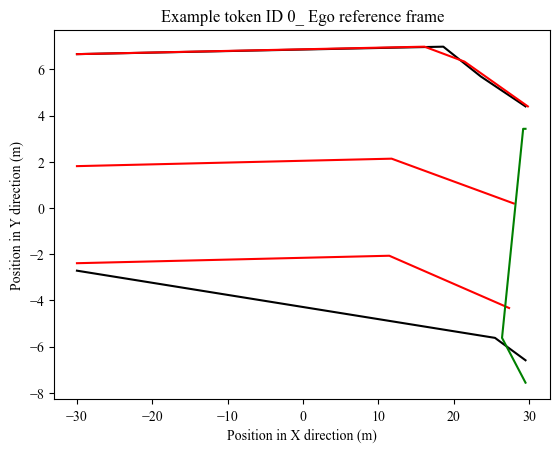

In [24]:
token_id = 0
token_example = pd.DataFrame(GlobalMap.iloc[5+token_id]['results'])
token_example = token_example[token_example['scores'] >= threshold]

for i in token_example.index:
        poly = token_example.loc[i]

        x_values = poly['vectors'][:,0]
        y_values = poly['vectors'][:,1]
        if poly['labels'] == 0:
            color = 'g'
            label = 'ped_crossing'
        elif poly['labels'] == 1:
            color = 'r'
            label = 'divider'
        else: 
            color = 'k'
            label = 'boundary'
        plt.plot(x_values, y_values, color=color, label=label)
plt.title("Example token ID "+str(token_id)+"_ Ego reference frame")
plt.xlabel('Position in X direction (m)')
plt.ylabel('Position in Y direction (m)')

Example plot in Global reference frame using pml methods 

Text(0.5, 1.0, 'Example token ID 0_ Global reference frame')

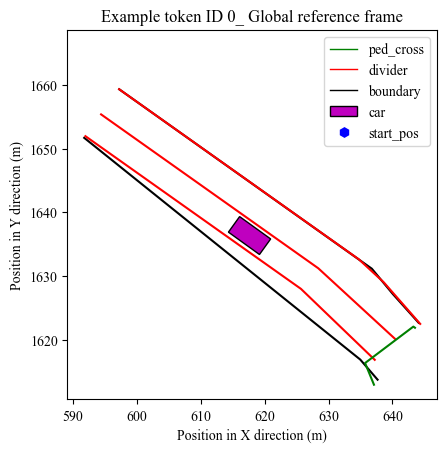

In [25]:
pml.plotCarMap_quat(GlobalMap, ego_T[i], 5+token_id, threshold=0.5)
plt.title("Example token ID "+str(token_id)+"_ Global reference frame")

Plot first 4 instances with the car

<function matplotlib.pyplot.show(close=None, block=None)>

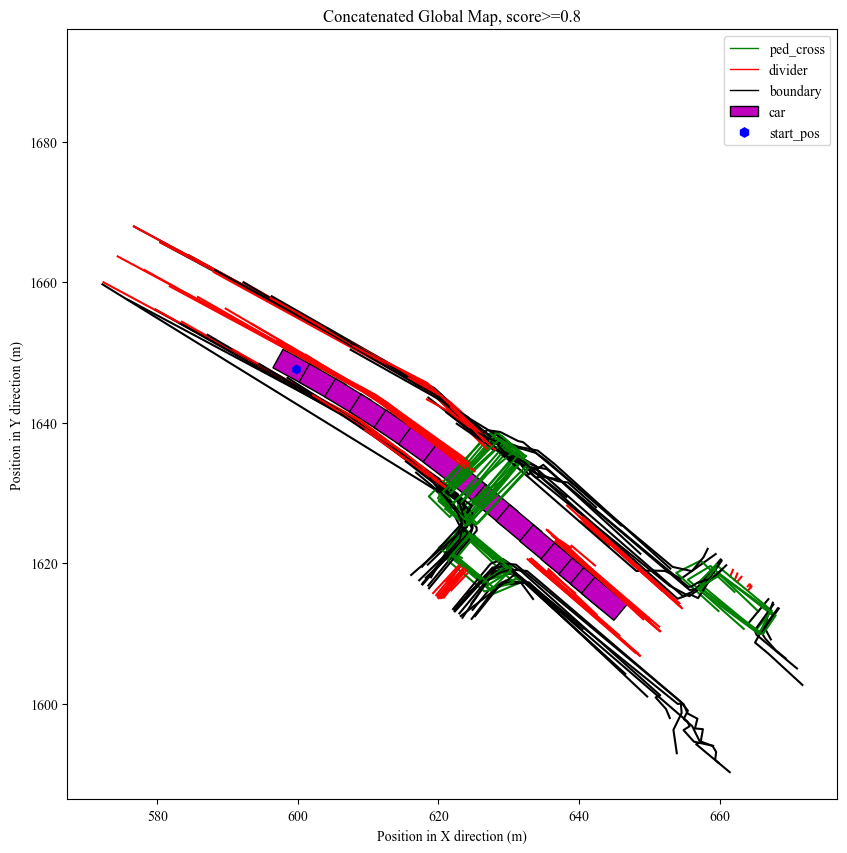

In [26]:
L = 15
plt.figure(figsize=(10,10))
for i in range(0,15):
    if i == 0:
        start_flag = True
    else: 
        start_flag = False
    #plotCar_quat(ego_T_0_3[i])
    pml.plotCarMap_quat(GlobalMap, ego_T[i], i+5, threshold, start_flag)
plt.title('Concatenated Global Map, score>=0.8')
plt.xlabel('Position in X direction (m)')
plt.ylabel('Position in Y direction (m)')
plt.show

##### Example of merging two polylines

In [27]:
poly1 = np.array([[29.50753769,  3.42424242],
                [29.1959799 ,  3.42424242],
                [26.3919598 , -5.62626263],
                [29.50753769, -7.56565657]])
poly2 = np.array([[29.50753769,  0.19191919],
                [26.08040201, -5.94949495],
                [29.50753769, -7.24242424]])
poly3 = np.array([[-30.0,          6.65656566],
                [ 18.60301508,   6.97979798],
                [ 23.5879397,   5.68686869],
                [ 29.50753769,   4.39393939]])
poly4 = np.array([[-30.0,          6.65656566],
                [ 16.11055276,   6.97979798],
                [ 21.40703518,   6.33333333],
                [ 29.81909548,   4.39393939]])

In [28]:
merged_poly = pml.merge_polys_v3(poly1,poly2)
merged_poly

array([[29.50753769,  3.42424242],
       [28.90120225,  0.38371582],
       [26.21117295, -5.77392343],
       [26.3419439 , -5.59835191],
       [29.43508248, -7.35901206]])

Plotting both polys and their merge using plot_poly function from pml

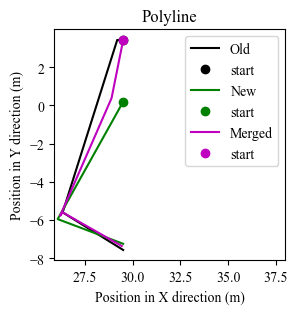

In [29]:
polys =[poly1, poly2, merged_poly]
names = ["Old", "New", "Merged"]
colors = ['k', 'g', 'm']
plt.figure(figsize=(3,3))
for poly, name, color in zip(polys, names, colors):
    pml.plot_poly(poly, name, color, square=True)

Merging and Plotting both polys using plot_merge_2polys function from pml

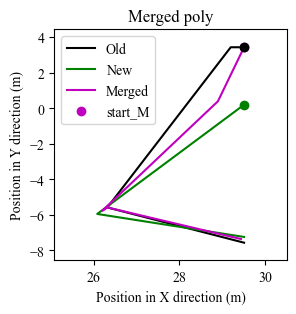

In [30]:
plt.figure(figsize=(3,3))
pml.plot_merge_2polys(poly1,poly2, square=False)

Another example: now extract polylines from a map token and try merging them

In [31]:
# Choose token andd apply threshold for polyline prediction score
token_ex = GlobalMap.iloc[5, :].results
token_pd = pd.DataFrame.from_dict(token_ex)
token_th = token_pd[token_pd['scores'] >= threshold]
token_th

,vectors,scores,labels
0,"[[-30.0, 6.6565656565656575], [18.603015075376...",0.999999,2
1,"[[-30.0, 1.8080808080808097], [11.748743718592...",0.999996,1
2,"[[29.507537688442213, -6.595959595959595], [25...",0.999979,2
3,"[[-30.0, -2.3939393939393945], [11.43718592964...",0.999866,1
4,"[[-30.0, 6.6565656565656575], [16.110552763819...",0.999790,1
5,"[[29.507537688442213, 3.4242424242424256], [29...",0.995296,0


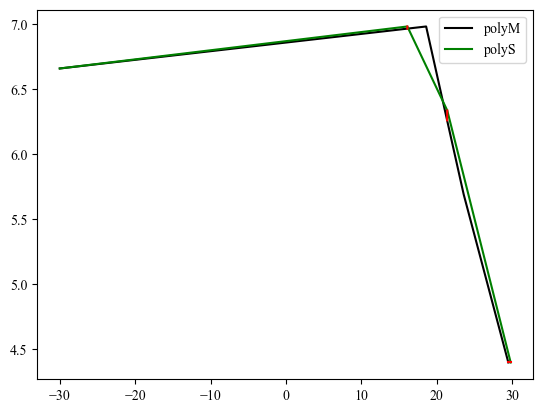

In [32]:
# Choosing two polylines and plotting them with porjection of secondary polyline on main one
# Note: Projection segments are shown in red (They don't look prependicular because of the axes ratios of the plot)
polyM = token_th['vectors'][0] # main poly
polyS = token_th['vectors'][4] # secondary poly
plt.plot(polyM[:,0], polyM[:,1], color='k', label='polyM')
plt.plot(polyS[:,0], polyS[:,1], color='g', label='polyS')

for p in polyS:
    p2,p3,p4 = pml.get_p2p3p4_in(p, polyM)
    plt.plot([p[0],p4[0]],[p[1],p4[1]], 'r-')

plt.legend()
# plt.axis('square')
# plt.ylim(top=10)

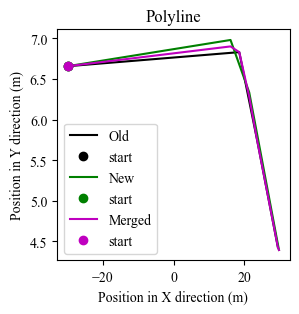

In [33]:
# merge the two polylines and plot the result
merged_poly = pml.merge_polys_v3(token_th['vectors'][0],token_th['vectors'][4])
polys =[token_th['vectors'][0], token_th['vectors'][4], merged_poly]
names = ["Old", "New", "Merged"]
colors = ['k', 'g', 'm']
plt.figure(figsize=(3,3))
for poly, name, color in zip(polys, names, colors):
    pml.plot_poly(poly, name, color, square=False)
    #plt.plot(poly[1:,0], poly[1:,1], 'o')

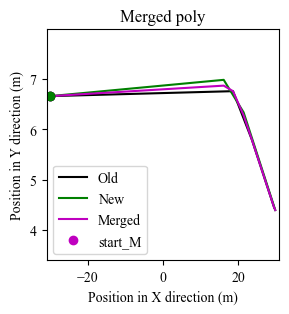

In [34]:
# or use plot_merge_2polys from pml 
token_id=0
plt.figure(figsize=(3,3))
pml.plot_merge_2polys(token_th['vectors'][token_id],token_th['vectors'][4], square=False)


##### Concatinating mutiple maps into one token

In [35]:
results_pd = pd.read_pickle("submission_vector.pkl")  
ego_TM = pd.read_pickle("ego_TM.pkl") 
GlobalMap = pd.DataFrame(results_pd)
idxs = [5,6,7,8,9,10,11,12,13,14,15,16,17,18] # tokens indeces to be merged

acc_th = 0.8

all_tokens = pd.DataFrame()
all_tokens_Unrefined= pd.DataFrame()

for token_id in idxs:
    token_id+=5 # added for s2 and s3
    token = GlobalMap.iloc[token_id].results
    token_pd = pd.DataFrame.from_dict(GlobalMap.iloc[token_id].results)#.copy(deep=True)
    token_th = token_pd[token_pd['scores'] >= acc_th]#.copy(deep=True)
    token_rw = pml.token2rw(token_th, token_id, ego_T)

    all_tokens_Unrefined = all_tokens_Unrefined.append(token_rw)
    token_refined = pml.refine_token(token_rw, proximity_th=0.1) # extra step to refine the tokens merge polylines with under 0.1 proximity
    all_tokens = all_tokens.append(token_refined)


In [36]:
# just saving the maps
ATu = all_tokens_Unrefined.reset_index().drop(columns=['index'])
ATu.to_pickle('all_tokens_Unrefined.pkl')  

In [37]:
ATr = all_tokens.reset_index().drop(columns=['index'])
ATr.to_pickle('all_tokens.pkl')  

Text(0, 0.5, 'Position in Y (m)')

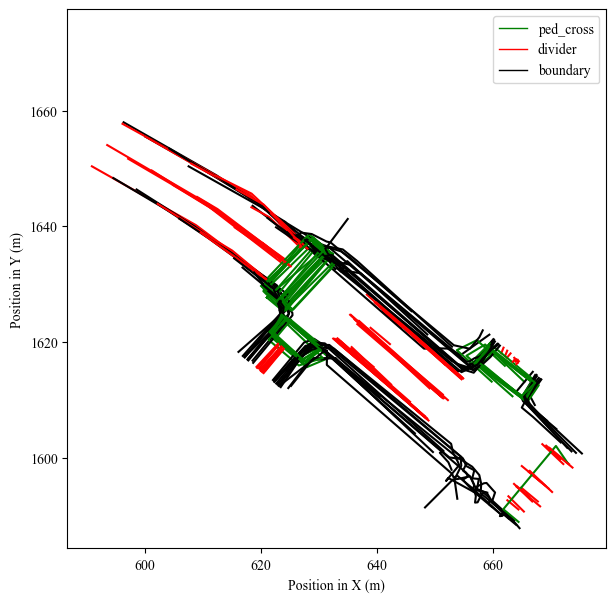

In [38]:
# Plotting all unrefined map tokens
plt.figure(figsize=(7,7))
pml.plot_token(ATu, name='Before Refine (acc_th=0.8)')
green = pml.Line2D([0],[0],color='g', lw=1, label='ped_cross')
red = pml.Line2D([0],[0],color='r', lw=1, label='divider')
black = pml.Line2D([0],[0],color='k', lw=1, label='boundary')
plt.legend(handles=[green, red, black])
plt.xlabel("Position in X (m)")
plt.ylabel("Position in Y (m)")

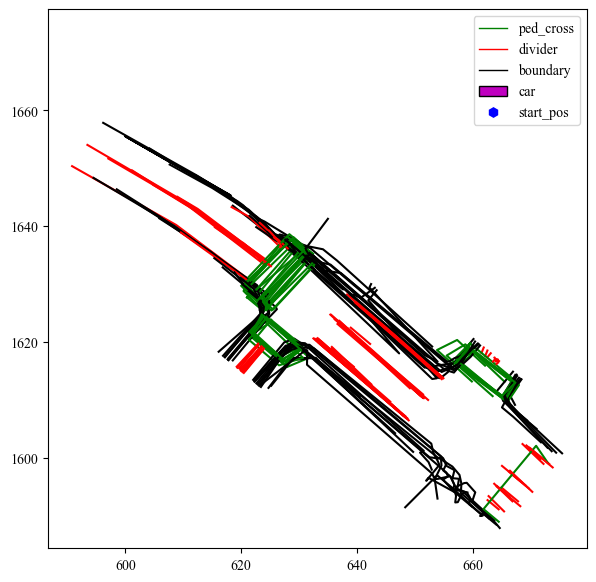

In [39]:
#Now plot all refined map tokens
plt.figure(figsize=(7,7))
pml.plot_token(ATr, name='After Refine (acc_th=0.8)')

In [40]:
Concatenated_map_unrefined = pd.read_pickle('all_tokens_Unrefined.pkl')
Concatenated_map = pd.read_pickle('all_tokens.pkl')

##### Generate ranom polys and test merging them

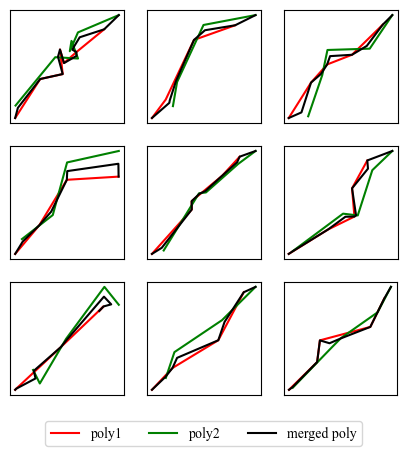

In [41]:
import random
fig, axs = plt.subplots(3, 3, figsize=(5, 5))
polys1=[]
polys2=[]
polysM = []
for i in range(3):
    for j in range(3):
        sx = np.random.randint(1, 20)
        ex = np.random.randint(80, 100)
        stepx = np.random.randint(5, 15)

        sy = np.random.randint(1, 20)
        ey = np.random.randint(80, 100)
        stepy = np.random.randint(5, 15)
        n = np.random.randint(4, 8)
        
        x = np.linspace(sx, ex, n) + np.random.rand(n)*30   #np.arange(sx, ex, stepx)
        y = np.linspace(sy, ey, n) + np.random.rand(n)*30
        poly1 = np.zeros((n,2))
        poly1[:,0] = x
        poly1[:,1] = y
        poly2 = poly1+ np.random.rand(*poly1.shape)*20

        
        if i ==0 and j ==0: t=True
        else: t=False
        
        polyM = pml.merge_polys_v4(poly1,poly2)
        polys1.append(poly1)
        polys2.append(poly2)
        polysM.append(polyM)
        axs[i, j].plot(poly1[:,0], poly1[:,1], color='r', label='poly1')
        axs[i, j].plot(poly2[:,0], poly2[:,1], color='g', label='poly2')
        axs[i, j].plot(polyM[:,0], polyM[:,1], color='k', label='merged poly')
        axs[i, j].tick_params(
            axis='both',          # changes apply to the x-axis
            which='both',      # both major and minor ticks are affected
            bottom=False,      # ticks along the bottom edge are off
            top=False,         # ticks along the top edge are off
            left=False,
            right=False,
            labelleft=False,
            labelbottom=False) # 
        plt.axis('square')

lines_labels = [fig.axes[0].get_legend_handles_labels() ]
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
fig.legend(lines, labels, loc='lower center', ncol=3)
       
for ax in axs.flat:
    ax.label_outer()

##### Example of generating network of linked polylines to be merged

In [42]:
def return_network(token, proximity_th):
    token_refined = pd.DataFrame() #.copy(deep=True)
    token_refined['vectors']= token['vectors']
    token_refined['scores']= token['scores']
    token_refined['labels']= token['labels']
    # create graph to store the connected polyes (nodes) to merge them at the end
    import networkx as nx
    G = nx.Graph()

    for idx, poly, label in zip(token.index, token['vectors'], token['labels']):
        poly2_list = token.drop(idx)
        #print("idx: ", idx)
        for idx2, poly2, label2 in zip(poly2_list.index, poly2_list['vectors'], poly2_list['labels']):
            d1, d2, check = pml.polyline_merge_check(poly, poly2, proximity_th)
            if label != label2 and (label ==0 or label2 ==0):
                check='False'
            #print(check)
            if check=='True':
                G.add_edge(idx, idx2)
        #print('\n')
    C = [list(c) for c in nx.connected_components(G)]
    return C

In [43]:
network = return_network(Concatenated_map_unrefined, 0.25)

Text(0, 0.5, 'Position in Y direction (m)')

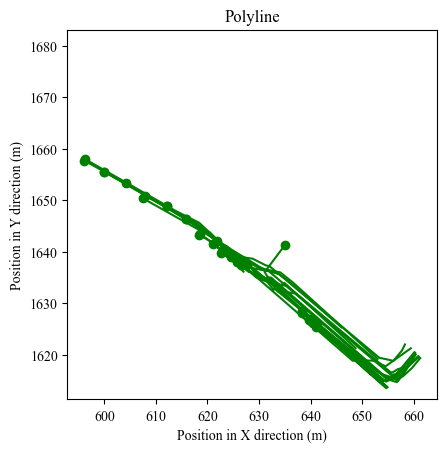

In [23]:
for i in network[3]:
    vec = Concatenated_map_unrefined.iloc[i]['vectors']
    pml.plot_poly(vec, color='g')
    plt.legend('', frameon=False)

plt.xlabel("Position in X direction (m)")
plt.ylabel("Position in Y direction (m)")

##### Example of merging one map at a time and plot ???

In [18]:
results_pd = pd.read_pickle("submission_vector.pkl")  
ego_TM = pd.read_pickle("ego_TM.pkl") 
ego_T = pd.read_pickle("ego_T.pkl") # ego to global [translation, rotation]

GlobalMap = pd.DataFrame(results_pd)
idxs = [5,6,7,8,9,10,11,12,13,14,15,16,17,18] # map tokens to be merged

acc_th = 0.8

all_tokens = pd.DataFrame()
all_tokens_Unrefined= pd.DataFrame()

for token_id in idxs:
    token_id+=5 # added for s2 and s3
    token = GlobalMap.iloc[token_id].results
    token_pd = pd.DataFrame.from_dict(GlobalMap.iloc[token_id].results)#.copy(deep=True)
    token_th = token_pd[token_pd['scores'] >= acc_th]#.copy(deep=True)
    token_rw = pml.token2rw(token_th, token_id, ego_T)

    all_tokens_Unrefined = all_tokens_Unrefined.append(token_rw)
    token_refined = pml.refine_token_v2(token_rw, proximity_th=1)
    all_tokens = all_tokens.append(token_refined)

In [3]:
merged_map_unrefined = all_tokens_Unrefined.reset_index().drop(columns=['index'])
merged_map = all_tokens.reset_index().drop(columns=['index'])

refined_merged_map_unrefined = pml.refine_token_v2(merged_map_unrefined, proximity_th=0.25)
refined_merged_map = pml.refine_token_v2(merged_map, proximity_th=0.2)

<function matplotlib.pyplot.show(close=None, block=None)>

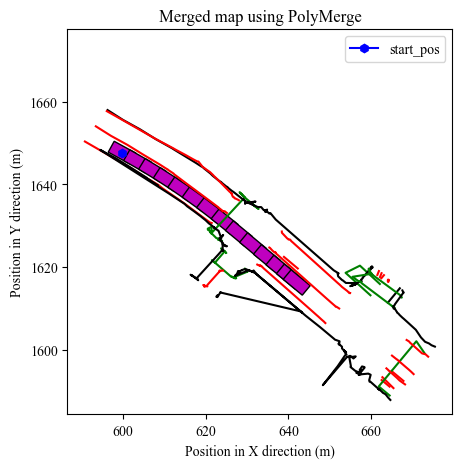

In [4]:
# Plotting all maps at once
plt.figure(figsize=(5,5))
pml.plot_token(refined_merged_map_unrefined, name='Refined map')

L = len(idxs)
for i in range(L):
    if i == 0:
        start_flag = True
    else: 
        start_flag = False
    pml.plotCar_quat(ego_T[i], start_flag)
    
plt.title('Merged map using PolyMerge')
plt.xlabel('Position in X direction (m)')
plt.ylabel('Position in Y direction (m)')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

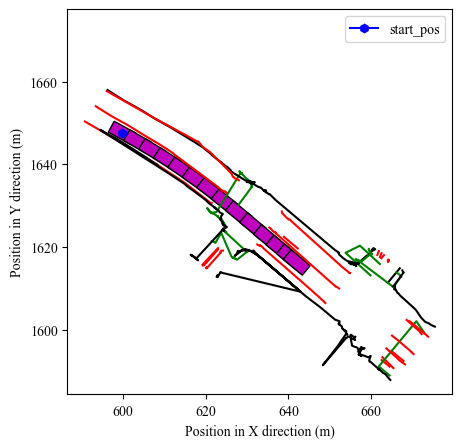

In [5]:
# plot 
plt.figure(figsize=(5,5))
pml.plot_token(refined_merged_map, name='Refined map')
plt.xlabel('Position in X direction (m)')
plt.ylabel('Position in Y direction (m)')

L = len(idxs)
for i in range(L):
    if i == 0:
        start_flag = True
    else: 
        start_flag = False
    pml.plotCar_quat(ego_T[i], start_flag)
    
plt.xlabel('Position in X direction (m)')
plt.ylabel('Position in Y direction (m)')
plt.show

##### Test other merging techniques for ped_crossing

Text(0, 0.5, 'Position in y direction (m)')

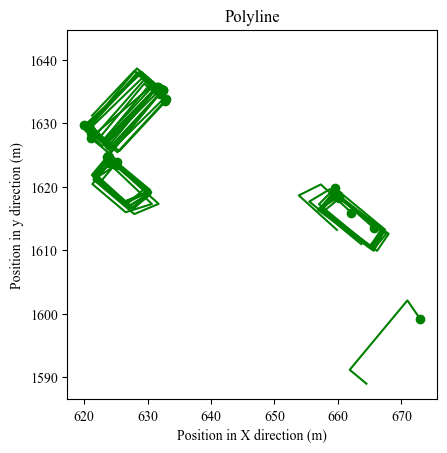

In [70]:
## Unrefined ped_crossings
ped_crossings = merged_map_unrefined[merged_map_unrefined['labels']==0]['vectors']

# plot the crossing to verify 
for vec in ped_crossings:
    pml.plot_poly(vec, color='g')
    plt.legend('', frameon=False)

#plt.title("Ped_crossing predictions")
plt.xlabel("Position in X direction (m)")
plt.ylabel("Position in y direction (m)")

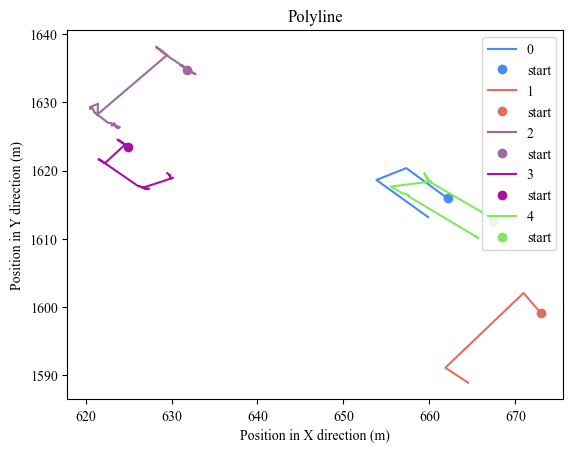

In [71]:
# refined ped_crossings
import random
i=0
def generate_random_color():
    """
    Generates a random RGB color.
    Returns:
    - Tuple representing the RGB values (r, g, b) where each value is in the range [0, 1].
    """
    r = random.random()
    g = random.random()
    b = random.random()
    return (r, g, b)

ped_crossings2 = refined_merged_map_unrefined[refined_merged_map_unrefined['labels']==0]['vectors']

for vec in ped_crossings2:
    pml.plot_poly(vec, str(i), color = generate_random_color(), square=False)
    polygon = {'type': 'Polygon', 'coordinates': vec}
    i+=1
plt.legend(loc='upper right')
plt.show()

Text(0, 0.5, 'Position in y direction (m)')

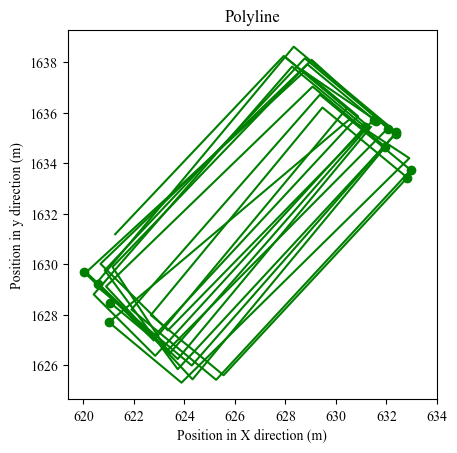

In [80]:
## try with on one of the crossings. THe plot shows all the polylines to be merged
crossing1 = []

for i in network[0]:
    crossing1.append(merged_map_unrefined.iloc[i]['vectors'])

# plot the crossing to verify 
for vec in crossing1:
    pml.plot_poly(vec, color='g')
    plt.legend('', frameon=False)

#plt.title("Ped_crossing predictions")
plt.xlabel("Position in X direction (m)")
plt.ylabel("Position in y direction (m)")

(619.3703317102853, 634.0068901153962, 1624.648744687579, 1639.28530309269)

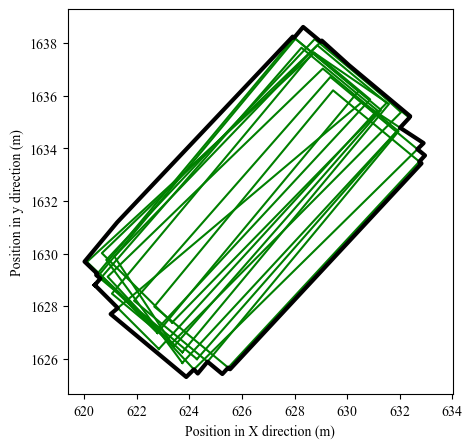

In [90]:
## convert them to shapely polygons and plot them
import shapely.geometry, shapely.ops

s = 5
plt.figure(figsize=(s,s))


polygons = []
for cross in crossing1:
    polygon = shapely.geometry.Polygon([[p[0], p[1]] for p in cross]).convex_hull
    plt.plot(*polygon.exterior.xy, c='g')#np.random.rand(3,));
    polygons.append(polygon)
max_shape = shapely.ops.unary_union(polygons)
plt.plot(*max_shape.exterior.xy, color='k', linewidth=3);

green = pml.Line2D([0],[0],color='g', lw=1, label='ped_cross predictions')
black = pml.Line2D([0],[0],color='k', lw=2, label='max shape')
plt.xlabel("Position in X direction (m)")
plt.ylabel("Position in y direction (m)")
plt.axis('square')

In [160]:
# Example shapes
shapes = [
    {'type': 'Polygon', 'coordinates': [[(1095.76, 278.06), (1095.76, 278.06), (1228.25, 301.98), (1377.29, 301.98), (1511.62, 283.58), (1603.62, 254.14), (1669.86, 224.7), (1737.95, 175.02), (1772.91, 129.01), (1791.31, 77.49), (1804.19, -1.63), (1796.83, -53.15), (1776.59, -121.24), (1726.91, -198.52), (1629.38, -303.4), (1491.38, -413.81), (1215.37, -575.73), (764.55, -809.42), (617.34, -883.03), (508.78, -929.03), (431.5, -951.11), (210.69, -965.83), (135.24, -938.23), (111.32, -888.55), (96.6, -783.66), (126.04, -619.9), (194.13, -469.01), (295.33, -296.04), (381.81, -150.68), (501.42, -20.03), (630.22, 83.01), (771.91, 167.66), (924.63, 232.06), (1027.68, 261.5), (1095.76, 278.06)]]},
    {'type': 'Polygon', 'coordinates': [[(1865.28, 145.78), (1865.28, 145.78), (1779.15, 286.31), (1629.55, 381.5), (1425.57, 438.17), (1226.11, 435.9), (1037.99, 404.17), (829.46, 306.71), (657.21, 170.72), (548.41, 32.46), (466.82, -87.67), (328.56, -407.25), (287.76, -559.11), (287.76, -731.37), (321.76, -869.63), (385.22, -944.42), (480.42, -967.09), (729.74, -971.62), (913.33, -917.23), (1144.51, -806.17), (1432.37, -647.51), (1659.02, -482.05), (1819.94, -302.99), (1908.34, -117.14), (1901.54, 14.32), (1865.28, 145.78)]]},
    {'type': 'Polygon', 'coordinates': [[(1175.76, 247.32), (1175.76, 247.32), (1336.5, 258.21), (1450.92, 251.4), (1550.36, 229.61), (1645.71, 195.55), (1724.72, 150.6), (1758.78, 111.1), (1777.85, -19.67), (1765.59, -71.44), (1709.74, -157.25), (1603.49, -258.06), (1463.18, -362.95), (1181.21, -504.61), (524.63, -841.08), (305.32, -965.04), (211.33, -1007.26), (-21.61, -1049.49), (-82.91, -1034.51), (-111.51, -975.93), (-111.51, -857.42), (-86.99, -745.72), (50.59, -505.98), (143.22, -332.98), (290.33, -165.43), (470.14, -30.57), (659.49, 78.41), (881.52, 175.12), (1044.99, 224.16), (1175.76, 247.32)]]},
    {'type': 'Polygon', 'coordinates': [[(886.58, 201.11), (886.58, 201.11), (1106.77, 271.57), (1249.89, 286.98), (1430.44, 286.98), (1531.73, 267.16), (1694.67, 205.51), (1760.72, 152.67), (1789.35, 106.43), (1798.15, 33.77), (1767.33, -107.15), (1613.2, -292.11), (1386.41, -450.64), (1150.81, -569.54), (710.44, -802.94), (441.81, -961.47), (325.11, -1020.92), (223.83, -1045.14), (49.88, -1067.16), (-16.18, -1047.35), (-27.19, -992.3), (-38.2, -913.03), (-16.18, -805.14), (32.26, -655.42), (175.38, -408.81), (340.52, -148.99), (494.65, -10.27), (688.42, 117.44), (813.92, 176.89), (886.58, 201.11)]]},
    {'type': 'Polygon', 'coordinates': [[(802.94, 60.03), (802.94, 60.03), (1012.93, 172.53), (1195.43, 230.02), (1370.42, 257.52), (1510.41, 250.02), (1610.41, 227.52), (1697.91, 195.02), (1755.41, 147.53), (1785.4, 102.53), (1795.4, 32.53), (1800.4, -57.47), (1790.4, -119.96), (1720.41, -227.46), (1585.41, -354.95), (1312.92, -552.45), (1055.43, -707.44), (730.45, -899.93), (540.45, -1009.93), (400.46, -1034.93), (275.46, -1044.93), (225.47, -1024.93), (197.97, -939.93), (200.47, -817.43), (272.96, -632.44), (367.96, -424.95), (472.96, -244.96), (612.95, -84.96), (752.94, 22.53), (802.94, 60.03)]]},
]

In [82]:
# Now rastrize them
import rasterio
from rasterio import Affine, features
from math import floor, ceil, sqrt

minx, miny, maxx, maxy = max_shape.bounds
dx = dy = 0.05  # grid resolution; this can be adjusted
lenx = dx * (ceil(maxx / dx) - floor(minx / dx))
leny = dy * (ceil(maxy / dy) - floor(miny / dy))

nx = int(lenx / dx)
ny = int(leny / dy)#
gt = Affine(
    dx, 0.0, dx * floor(minx / dx),
    0.0, -dy, dy * ceil(maxy / dy))

In [83]:
pa = np.zeros((ny, nx), 'd')
for s in polygons:
    r = features.rasterize([s], (ny, nx), transform=gt)
    pa[r > 0] += 1
pa /= len(polygons)  # normalize values

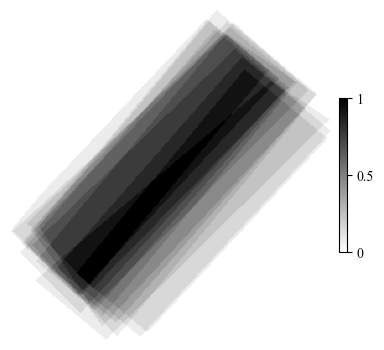

In [85]:
# Now plot the normalized values of the merged rasterized polygons
s=5
plt.figure(figsize=(s,s))
plt.imshow(pa,cmap='gray_r')
cbar = plt.colorbar(shrink=0.4, pad=0.02, ticks=[0, 0.5, np.max(pa)])
cbar.ax.set_yticklabels(['0', '0.5', '1'])
plt.axis('off')

#plt.xlabel("Position in X direction (m)")
#plt.ylabel("Position in y direction (m)")
#plt.axis('square')
plt.show()

In [86]:
# Now apply a gaussian blur
from scipy.signal import fftconvolve

def gaussian_blur(in_array, gt, size):
    """Gaussian blur, returns tuple `(ar, gt2)` that have been expanded by `size`"""
    # expand in_array to fit edge of kernel; constant value is zero
    padded_array = np.pad(in_array, size, 'constant')
    # build kernel
    x, y = np.mgrid[-size:size + 1, -size:size + 1]
    g = np.exp(-(x**2 / float(size) + y**2 / float(size)))
    g = (g / g.sum()).astype(in_array.dtype)
    # do the Gaussian blur
    ar = fftconvolve(padded_array, g, mode='full')
    # convolved increased size of array ('full' option); update geotransform
    gt2 = Affine(
        gt.a, gt.b, gt.xoff - (2 * size * gt.a),
        gt.d, gt.e, gt.yoff - (2 * size * gt.e))
    return ar, gt2

In [87]:
spa, sgt = gaussian_blur(pa, gt, 100)
thresh = 0.5  # median
pm = np.zeros(spa.shape, 'B')
pm[spa > thresh] = 1

In [88]:
poly_shapes = []
for sh, val in features.shapes(pm, transform=sgt):
    if val == 1:
        poly_shapes.append(shapely.geometry.shape(sh))
if not any(poly_shapes):
    raise ValueError("could not find any shapes")
avg_poly = shapely.ops.unary_union(poly_shapes)
# Simplify the polygon
simp_poly = avg_poly.simplify(sqrt(dx**2 + dy**2))
simp_shape = shapely.geometry.mapping(simp_poly)

min_rect = simp_poly.minimum_rotated_rectangle

(619.3703317102853, 634.0068901153962, 1624.648744687579, 1639.28530309269)

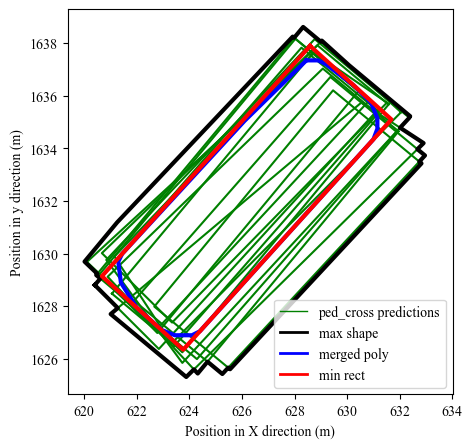

In [89]:
## convert them to shapely polygons and plot them
s=5
plt.figure(figsize=(s,s))

for cross in crossing1:
    polygon = shapely.geometry.Polygon([[p[0], p[1]] for p in cross])#.convex_hull
    plt.plot(*polygon.exterior.xy, c='g')#np.random.rand(3,));

plt.plot(*max_shape.exterior.xy, color='k', linewidth=3);
plt.plot(*simp_poly.exterior.xy, color='b', linewidth=3);

plt.plot(*min_rect.exterior.xy, color='r', linewidth=3);

green = pml.Line2D([0],[0],color='g', lw=1, label='ped_cross predictions')
black = pml.Line2D([0],[0],color='k', lw=2, label='max shape')
blue = pml.Line2D([0],[0],color='b', lw=2, label='merged poly')
red = pml.Line2D([0],[0],color='r', lw=2, label='min rect')

plt.legend(handles=[green, black, blue, red])
#plt.legend(handles=[green, black, blue, red], loc=2, prop={'size': 8})
plt.xlabel("Position in X direction (m)")
plt.ylabel("Position in y direction (m)")
plt.axis('square')

##### Now try to apply it for the merged maps

In [173]:
def refine_token_cross(token, proximity_th):
    token_refined = pd.DataFrame() #.copy(deep=True)
    token_refined['vectors']= token['vectors']
    token_refined['scores']= token['scores']
    token_refined['labels']= token['labels']
    # create graph to store the connected polyes (nodes) to merge them at the end
    import networkx as nx
    G = nx.Graph()

    for idx, poly, label in zip(token.index, token['vectors'], token['labels']):
        poly2_list = token.drop(idx)
        for idx2, poly2, label2 in zip(poly2_list.index, poly2_list['vectors'], poly2_list['labels']):
            d1, d2, check = pml.polyline_merge_check(poly, poly2, proximity_th)
            if label != label2: #and (label ==0 or label2 ==0):
                check='False'
            if check=='True':
                G.add_edge(idx, idx2)
    C = [list(c) for c in nx.connected_components(G)]
    print(C)

    i = 0
    for idxs2merge in C:
        merged_poly = token.loc[idxs2merge[0]]
        print("idxs2merge: ", idxs2merge, " label: ", merged_poly['labels'])

        if merged_poly['labels']==0:
            polygons = []
            for cross in token.loc[idxs2merge]['vectors']:
                polygon = shapely.geometry.Polygon([[p[0], p[1]] for p in cross]).convex_hull
                polygons.append(polygon)

            max_shape = shapely.ops.unary_union(polygons)
            minx, miny, maxx, maxy = max_shape.bounds
            dx = dy = 0.05  # grid resolution; this can be adjusted
            lenx = dx * (ceil(maxx / dx) - floor(minx / dx))
            leny = dy * (ceil(maxy / dy) - floor(miny / dy))

            nx = int(lenx / dx)
            ny = int(leny / dy)
            gt = Affine(
                dx, 0.0, dx * floor(minx / dx),
                0.0, -dy, dy * ceil(maxy / dy))
            pa = np.zeros((ny, nx), 'd')
            for s in polygons:
                r = features.rasterize([s], (ny, nx), transform=gt)
                pa[r > 0] += 1
            pa /= len(polygons)  # normalise values
            spa, sgt = gaussian_blur(pa, gt, 100)
            thresh = 0.5  # median
            pm = np.zeros(spa.shape, 'B')
            pm[spa > thresh] = 1

            poly_shapes = []
            for sh, val in features.shapes(pm, transform=sgt):
                if val == 1:
                    poly_shapes.append(shapely.geometry.shape(sh))
            if not any(poly_shapes):
                raise ValueError("could not find any shapes")
            avg_poly = shapely.ops.unary_union(poly_shapes)
            # Simplify the polygon
            simp_poly = avg_poly.simplify(sqrt(dx**2 + dy**2))
            min_rect = simp_poly.minimum_rotated_rectangle

            min_rect_vec = min_rect.exterior.xy
            merged_poly['vectors'] = np.zeros((len(min_rect_vec[0]),2))
            merged_poly['vectors'] [:,0] = min_rect_vec[0]
            merged_poly['vectors'] [:,1] = min_rect_vec[1]
            
        else:
            for idx2 in idxs2merge[1:]:
                merged_poly['vectors']= pml.merge_polys_edge_v2(merged_poly['vectors'] ,token.loc[idx2]['vectors'])
                if merged_poly['labels'] != token.loc[idx2]['labels']:
                    merged_poly['labels'] = 2
        merged_poly['scores'] = 0
        token_refined = token_refined.drop(idxs2merge)
        token_refined = token_refined.append(merged_poly)
    
    return token_refined.reset_index()


In [190]:
refined_merged_map_cross = refine_token_cross(merged_map_unrefined, proximity_th=0.5)

[[0, 129, 162, 70, 43, 12, 108, 111, 149, 184, 89, 56, 30], [1, 35, 100, 133, 73, 44, 28, 16, 113, 86, 57, 156], [33, 2, 130, 163, 26, 102, 71, 14, 46, 179, 83, 147, 121, 58], [64, 153, 99, 3, 39, 136, 171, 17, 53, 87, 185, 122, 27], [128, 97, 4, 166, 72, 41, 110, 49, 81, 19, 148, 182, 25, 61], [69, 5, 40, 168, 107, 15, 80, 144, 51, 117, 183, 24, 93, 126], [67, 38, 6, 106, 139, 78, 82, 21, 54, 119, 157], [96, 37, 134, 7, 42, 75, 170, 177, 18, 115, 152, 59, 92, 29], [32, 132, 103, 8, 13, 77, 174, 48, 114, 23, 154, 91, 60, 189], [9, 34, 45, 66], [131, 36, 105, 10, 173, 50, 20, 116, 88, 155, 63], [164, 104, 11, 140, 180, 22, 55, 118, 150, 94, 31], [65, 161, 101, 76, 143, 47, 112, 181, 90, 125], [74, 62], [160, 109, 142, 79, 176, 85, 124, 95], [98, 165, 135, 146, 178, 84, 120], [169, 145, 123, 188, 127], [151, 137, 186, 167], [138, 158], [187, 172, 141, 159]]
idxs2merge:  [0, 129, 162, 70, 43, 12, 108, 111, 149, 184, 89, 56, 30]  label:  0
idxs2merge:  [1, 35, 100, 133, 73, 44, 28, 16, 113

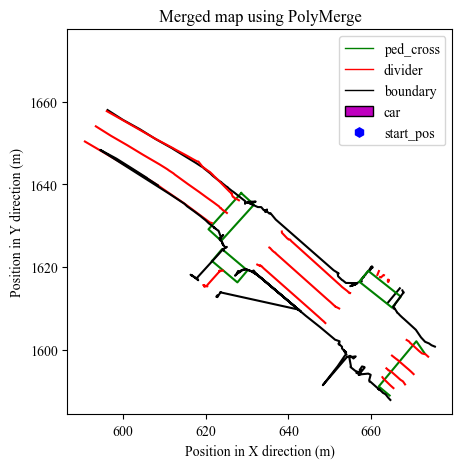

In [191]:
plt.figure(figsize=(5,5))
pml.plot_token(refined_merged_map_cross, name='Refined map')

plt.title('Merged map using PolyMerge')
plt.xlabel('Position in X direction (m)')
plt.ylabel('Position in Y direction (m)')
plt.show